<a href="https://colab.research.google.com/github/SASI-0717/Data-science-/blob/main/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.2123
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1191
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.1081
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1072
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1067
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1065
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0994
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1107
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1042
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1012
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1078
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0996
Epoch 13/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0993
Epoch 14/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1009
Epoch 15/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0998
Epoch 16/20
12/

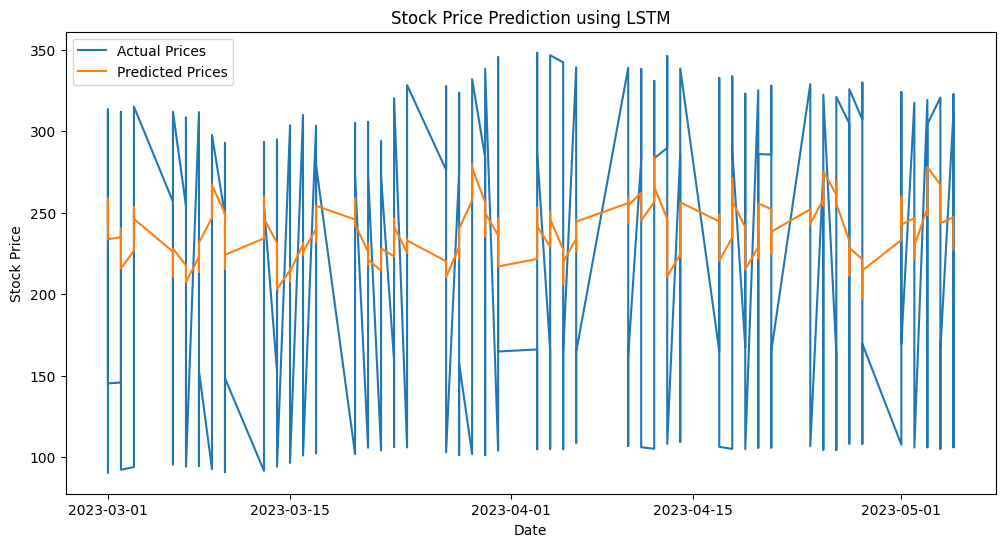

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load your CSV file
df = pd.read_csv('/content/drive/MyDrive/stocks.csv')

# Prepare the data
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
data = df[['Close']].values

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequencessequences
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Reshape X for LSTM [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=20, batch_size=16)

# Predict and invert scaling
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12,6))
plt.plot(df['Date'][sequence_length:], actual_prices, label='Actual Prices')
plt.plot(df['Date'][sequence_length:], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()